# Global indicator project
## Create sample points over OSM pedestrain network

This notebook creates sample points over the OSM pedestrian street networks from OpenStreetMap using OSMnx. This approach is taken to calculate location based indicators for local analysis (e.g. street connectivity; daily living access).   

Process:
1. Load or create study region network graph and edge shapefile
2. Load GHS urban built-up area and limit network within the urban areas
3. Create sample points within study region urban 
    - Get regular interval sample points and nearest nodes using ox.redistribute_vertices
    - Save sample point shapefile at OSM folder

In [1]:
# load functiong from local python modules
from setup_OSMnetwork import *
from setup_local_analysis import *

# load study region parameters
from config import *

## 1. Load or create study region network graph and edge shapefile

In [3]:
# Load pedestrain street network graphml from local folder
G = get_OSM_G(G_filename, OSM_folder)

In [4]:
# Load pedestrain street network edge shapefile from local folder
edges_gdf = get_OSM_edges_gdf(OSM_shapefile_path, OSM_folder, polygon=None)

## 2. Load urban built-up area and limit network within the urban areas

In [13]:
#load builtup area raster
builtup2014 = gpd.GeoDataFrame.from_file(builtup_filepath)

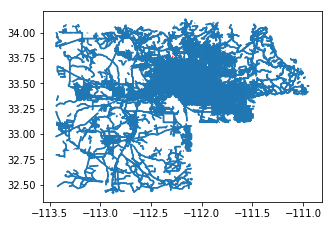

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = edges_gdf.plot(ax=ax, alpha=0.3)
ax = builtup2014.plot(ax=ax, color = 'red')

#ax.set_axis_off()
plt.show()

In [ ]:
start = time.time()
task = "create and save urban OSM street network geodataframe shapefile for {}".format(placename)
urban_edges_gdf_proj = get_studyregion_urban_network(edges_gdf, builtup2014, to_crs)

#save urban street network shapefile
ox.save_gdf_shapefile(urban_edges_gdf_proj, filename='{studyregion}_proj_urban_walk{suffix}'.format(
        studyregion = placename, suffix = suffix), folder=OSM_folder)

print('Completed task "{}" in {:,.2f} seconds'.format(task, time.time() - start)) 


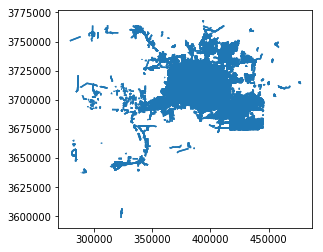

In [3]:
urban_edges_gdf_proj.plot()

## 3. Create sample points

In [2]:
# load urban walkable street network
urban_edges_gdf_proj = gpd.GeoDataFrame.from_file(urban_OSM_filepath)

In [6]:
# create sample points geodataframe and edge data
start = time.time()
task = "create and save urban sample points shapefile for {}".format(placename)
points_gdf = create_sample_points_gdf(urban_edges_gdf_proj, point_dist=300)

# save sample point shapefile
ox.save_gdf_shapefile(points_gdf, filename='{studyregion}_urban_sample_points{suffix}'.format(
        studyregion = placename, suffix = suffix), folder=OSM_folder)

print('Completed task "{}" with {} sample points created in {:,.2f} seconds'.format(
    task, len(points_gdf), time.time() - start)) 


Completed task "create and save urban sample points shapefile for phoenix" with 2331492 sample points created in 2,610.19 seconds


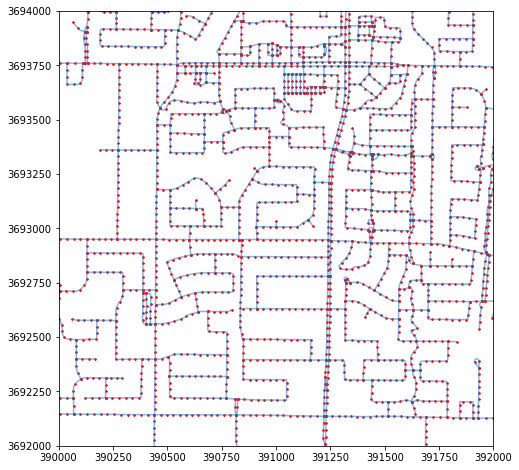

In [12]:
# plot to examine the distribution
fig, ax = plt.subplots(figsize=(8, 8))
ax = edges_gdf.plot(ax=ax, alpha=0.3)
ax = points_gdf.plot(ax=ax, color='red', markersize=1.5)
ax.set_xlim(390000, 392000)
ax.set_ylim(3692000, 3694000)
#ax.axis('off')
plt.show()